In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import cv2
import csv

In [2]:
product1_image= cv2.imread('./data/product1.jpg')
data = pd.read_csv('./data/bgr.csv', header = None)
resize_image = cv2.resize(product1_image, (1920, 1080))
height, width, channels = resize_image.shape[:3]

product1_bgr = np.empty((0, 3))
for i in range(1, height, 5):
    for j in range(1, width, 5):
        tmp = np.array(resize_image[i, j, :])
        product1_bgr = np.append(product1_bgr, np.array([tmp]), axis = 0)
    
data = data.values

X_data = data[:,:-1]
y_data = data[:,-1]
X_test = product1_bgr
cell = int((width * height) / 25)

mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sum = sum(predict)

forest_per = 1 - (predict_sum / cell)

print("緑地の割合 {:.3f}%".format(forest_per * 100))

緑地の割合 74.425%


In [3]:
product1_bgr = np.empty((0, 3))
for i in range(1, height, 5):
    for j in range(1, width, 5):
        tmp = np.array(resize_image[i, j, :])
        product1_bgr = np.append(product1_bgr, np.array([tmp]), axis = 0)

X_data = data[:,:-1]
y_data = data[:,-1]
X_test = product1_bgr
cell = int((width * height) / 25)

mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
print(predict)
predict_sum = sum(predict)

forest_per = 1 - (predict_sum / cell)

print("緑地の割合 {:.3f}%".format(forest_per * 100))

[0 0 0 ... 0 0 0]
緑地の割合 74.019%


In [4]:
B = data[:,0]
G = data[:,1]
R = data[:,2]

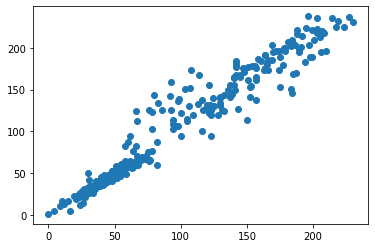

In [5]:
plt.scatter(R, B)

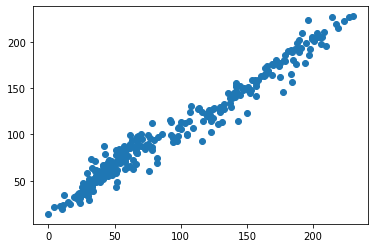

In [6]:
plt.scatter(R, G)

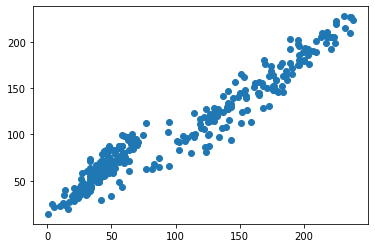

In [7]:
plt.scatter(B, G)